In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.model_selection import train_test_split

In [2]:
import shap

In [3]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
from sklearn.gaussian_process.kernels import RBF

In [4]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [5]:
from sklearn import linear_model

In [7]:
data_F = pd.read_csv('features_for_project.csv')
data_F

,cycle,F1_CC,F2_CV,F3_CC_slope,F4_CC_kurt,SOH
0,1,0.878529,1.000000,0.256147,0.483536,1.000000
1,2,0.984806,0.606921,0.397590,0.580847,1.001942
2,3,0.994428,0.550300,0.386424,0.585378,1.002913
3,5,0.943717,0.377366,0.042422,0.657359,1.002913
4,6,0.944729,0.361224,0.042337,0.619481,1.002913
...,...,...,...,...,...,...
4524,4537,0.634733,0.031338,0.085357,0.962193,0.917476
4525,4538,0.634469,0.031865,0.086304,0.698442,0.917476
4526,4539,0.710758,0.033976,0.958762,0.714654,0.919417
4527,4540,0.711042,0.109779,0.477329,0.701941,0.919417


In [8]:
F_X = data_F[['F1_CC', 'F2_CV', 'F3_CC_slope', 'F4_CC_kurt']]
F_y = data_F['SOH']

In [9]:
F_X_train, F_X_test, F_y_train, F_y_test = train_test_split(F_X, F_y, test_size=0.2, shuffle=True, random_state=42)

In [11]:
data_PM = pd.read_csv('231130_several_processmap.csv')
data_PM

,cycles,v_start,v_end,v_nplat_area,v_nplat_slope,curr_area,curr_nplat_slope,Qc_end,Qc_area,Qc_slope,...,v_slope_dis,curr_end_dis,curr_area_dis,curr_slope_dis,Qd_end_dis,Qd_area_dis,Qd_slope_dis,Qd_skew_dis,Qd_kurt_dis,SOH
0,1,2.940,3.435,2179.099,0.000103,351.549,-0.000066,1.019,342.890,0.000123,...,-0.000104,0.0,-403.398,0.000075,1.030,416.239,0.000140,-0.546358,-0.626673,1.000000
1,2,2.725,3.438,2264.986,0.000133,370.408,-0.000136,1.037,358.829,0.000128,...,-0.000103,0.0,-403.922,0.000075,1.032,417.209,0.000140,-0.547812,-0.619922,1.001942
2,3,2.737,3.442,2265.727,0.000131,370.294,-0.000136,1.037,358.950,0.000129,...,-0.000104,0.0,-403.918,0.000075,1.033,417.017,0.000140,-0.546900,-0.629195,1.002913
3,5,2.986,3.511,189.347,0.000095,31.397,-0.000070,1.037,36.424,0.000131,...,-0.000449,-1.1,-31.898,-0.000325,1.033,15.913,0.000306,NaN,NaN,1.002913
4,6,2.986,3.512,189.338,0.000095,31.385,-0.000070,1.037,36.425,0.000131,...,-0.000449,-1.1,-31.897,-0.000325,1.033,15.913,0.000306,NaN,NaN,1.002913
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4524,4537,2.967,3.525,174.913,0.000105,28.886,-0.000078,0.950,29.941,0.000133,...,-0.000494,-1.1,-28.600,-0.000356,0.945,12.855,0.000305,NaN,NaN,0.917476
4525,4538,2.967,3.525,174.911,0.000105,28.885,-0.000078,0.950,29.940,0.000133,...,-0.000494,-1.1,-28.600,-0.000356,0.945,12.855,0.000305,NaN,NaN,0.917476
4526,4539,1.996,3.468,2205.342,0.000262,366.382,-0.000077,0.950,307.497,0.000133,...,-0.000120,0.0,-376.200,0.000081,0.947,360.821,0.000139,-0.545592,-0.623715,0.919417
4527,4540,2.690,3.472,2109.691,0.000149,346.197,-0.000153,0.952,307.015,0.000132,...,-0.000122,0.0,-376.750,0.000081,0.947,361.237,0.000139,-0.546539,-0.623438,0.919417


In [12]:
PM_X = data_PM.drop(['SOH', 'cycles', 'Qd_skew_dis', 'Qd_kurt_dis'], axis=1)
PM_y = data_PM['SOH']

In [13]:
len(PM_X.columns)

21

In [14]:
len(PM_X.columns)

21

In [16]:
for i in data_PM.columns:
    if i not in data_PM.columns:
        print(i)

In [17]:
PM_X_train, PM_X_test, PM_y_train, PM_y_test = train_test_split(PM_X, PM_y, test_size=0.2, shuffle = True, random_state=42)

In [19]:
ch = pd.read_csv('ch_features_ys.csv')
dis = pd.read_csv('dis_features_cncnf_ys.csv').drop(['cycles'], axis=1)
data = pd.concat([ch, dis], axis=1)
soh = pd.read_csv('soh_ys.csv')
data = pd.concat([data, soh], axis=1)

In [20]:
l = []
for i in range(len(data)):
    soh = data['SOH'].tolist()[i]
    if soh > 1.1 or soh < 0.9:
        l.append(i)

In [21]:
data = data.drop(l, axis=0)

In [22]:
len(data)

4529

In [23]:
X = data.drop(['SOH', 'cycles', 'Qd_skew_dis', 'Qd_kurt_dis'], axis=1)
y = data['SOH']

In [24]:
len(X.columns)

26

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

# Linear regression

In [512]:
lr = linear_model.LinearRegression()
lr_F = linear_model.LinearRegression()
lr_PM = linear_model.LinearRegression()

# train
lr.fit(X_train, y_train)
lr_F.fit(F_X_train, F_y_train)
lr_PM.fit(PM_X_train, PM_y_train)

LinearRegression()

In [513]:
y_pred = lr.predict(X_test)
F_y_pred = lr_F.predict(F_X_test)
PM_y_pred = lr_PM.predict(PM_X_test)

In [514]:
e = y_test.tolist()
e.sort()
f = y_pred.tolist()
f.sort()

a = F_y_test.tolist()
a.sort()
b = F_y_pred.tolist()
b.sort()

c = PM_y_test.tolist()
c.sort()
d  = PM_y_pred.tolist()
d.sort()

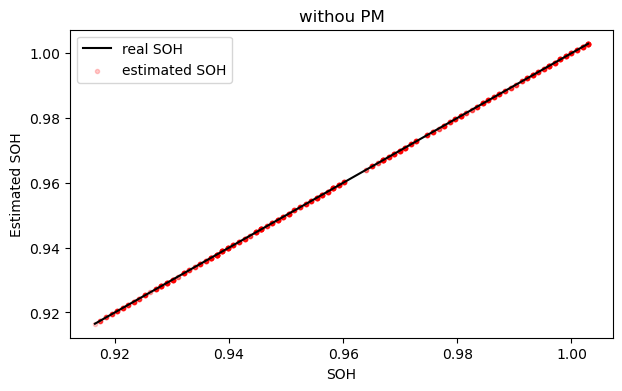

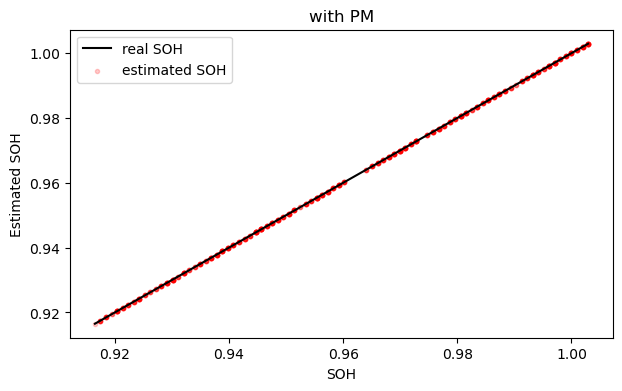

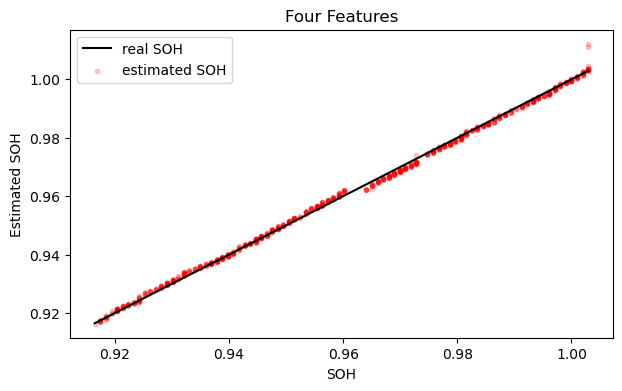

<Figure size 640x480 with 0 Axes>

In [515]:
##SOH##

titles = ['without PM', 'with PM', 'Four Features']

real = [e, c, a]
est = [f, d, b]

for i, (r, e, t) in enumerate(zip(real, est, titles)):
    plt.figure(figsize=(7,4))
    plt.plot(r, r, c='k', label='real SOH')
    plt.scatter(r, e, c='r', alpha=0.2, s=3**2, label='estimated SOH')
    plt.title(t)
    plt.xlabel('SOH')
    plt.ylabel('Estimated SOH')
    plt.legend()
    
plt.show()    
plt.savefig('/media/sf_share/Ridge_SOH_graph.png')

In [516]:
##RMSE##
s = []
n = len(y_test)
for  r, e in  zip(y_test.tolist(), y_pred.tolist()):
    s.append((r-e)**2)
lr_rmse = math.sqrt(sum(s)/n)
lr_rmse

8.95204406218031e-16

In [517]:
##RMSE##
s =[]
n = len(F_y_test)
for r, e in zip(F_y_test.tolist(), F_y_pred.tolist()):
    s.append((r-e)**2)
F_lr_rmse = math.sqrt(sum(s)/n)
F_lr_rmse

0.0015487484359904252

In [518]:
##RMSE##
s =[]
n = len(PM_y_test)
for r, e in zip(PM_y_test.tolist(), PM_y_pred.tolist()):
    s.append((r-e)**2)
PM_lr_rmse = math.sqrt(sum(s)/n)
PM_lr_rmse

2.8934126710758207e-10

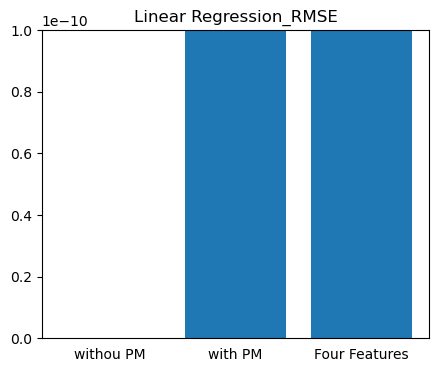

In [519]:
##중간 생략 세로 막대 그래프 만들기
plt.figure(figsize=(5,4))
models = ['withou PM', 'with PM', 'Four Features']
values = [lr_rmse, PM_lr_rmse, F_lr_rmse]
plt.bar(models, values)
plt.tick_params(axis='x', bottom=False)
plt.ylim(0.0000, 1e-10)
plt.title('Linear Regression_RMSE')
plt.show()

# GPR (mean_prediction, std_prediction)

In [26]:
kernel = 1 * RBF(length_scale=1.0, length_scale_bounds=(1e-5, 1e5))
gaussian_process = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)
gaussian_process.fit(X_train, y_train)
gaussian_process.kernel_

27.1**2 * RBF(length_scale=227)

In [27]:
kernel = 1 * RBF(length_scale=1.0, length_scale_bounds=(1e-5, 1e5))
gaussian_process_F = GaussianProcessRegressor(n_restarts_optimizer=9)
gaussian_process_F.fit(F_X_train, F_y_train)
gaussian_process.kernel_

27.1**2 * RBF(length_scale=227)

In [28]:
kernel = 1 * RBF(length_scale=1.0, length_scale_bounds=(1e-5, 1e5))
gaussian_process_PM = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)
gaussian_process_PM.fit(PM_X_train, PM_y_train)
gaussian_process_PM.kernel_

30.4**2 * RBF(length_scale=270)

In [29]:
mean_prediction, std_prediction = gaussian_process.predict(X_test, return_std=True)

Predicted variances smaller than 0. Setting those variances to 0.


In [30]:
mean_prediction_F, std_prediction_F = gaussian_process_F.predict(F_X_test, return_std=True)

In [31]:
mean_prediction_PM, std_prediction_PM = gaussian_process_PM.predict(PM_X_test, return_std=True)

Predicted variances smaller than 0. Setting those variances to 0.


In [32]:
mean_prediction_F.shape

(906,)

In [33]:
type(mean_prediction_F)

numpy.ndarray

In [34]:
e1 = y_test.tolist()
e1.sort()
f1 = mean_prediction.tolist()
f1.sort()

a1 = F_y_test.tolist()
a1.sort()
b1 = mean_prediction_F.tolist()
b1.sort()

c1 = PM_y_test.tolist()
c1.sort()
d1  = mean_prediction_PM.tolist()
d1.sort()

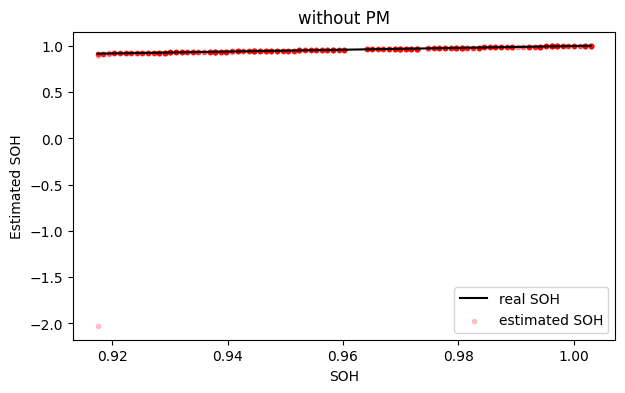

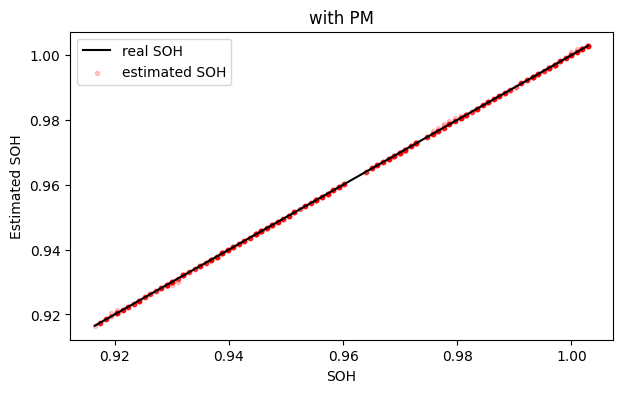

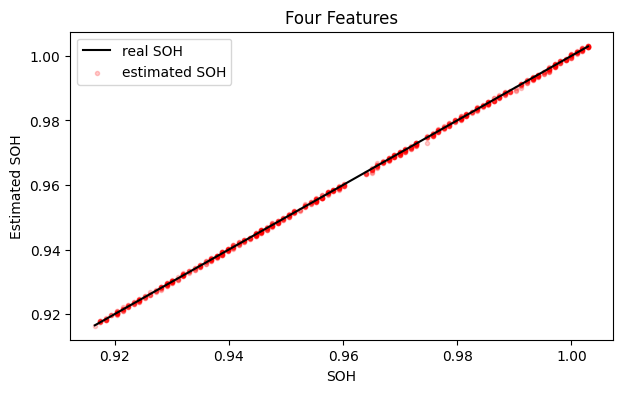

<Figure size 640x480 with 0 Axes>

In [89]:
##SOH##

titles = ['without PM', 'with PM', 'Four Features']

real = [e1, c1, a1]
est = [f1, d1, b1]

for i, (r, e, t) in enumerate(zip(real, est, titles)):
    plt.figure(figsize=(7,4))
    plt.plot(r, r, c='k', label='real SOH')
    plt.scatter(r, e, c='r', alpha=0.2, s=3**2, label='estimated SOH')
    plt.title(t)
    plt.xlabel('SOH')
    plt.ylabel('Estimated SOH')
    plt.legend()
    
plt.show()    
plt.savefig('Ridge_SOH_graph.png')

In [41]:
##RMSE##
s =[]
n = len(y_test)
for r, e in zip(y_test.tolist(), mean_prediction.tolist()):
    s.append((r-e)**2)
gpr_rmse = math.sqrt(sum(s)/n)
gpr_rmse

0.09897853095333384

In [42]:
##RMSE##
s =[]
n = len(F_y_test)
for r, e in zip(F_y_test.tolist(), mean_prediction_F.tolist()):
    s.append((r-e)**2)
F_gpr_rmse = math.sqrt(sum(s)/n)
F_gpr_rmse

0.0007709052445919278

In [43]:
##RMSE##
s =[]
n = len(PM_y_test)
for r, e in zip(PM_y_test.tolist(), mean_prediction_PM.tolist()):
    s.append((r-e)**2)
PM_gpr_rmse = math.sqrt(sum(s)/n)
PM_gpr_rmse

0.00022203208602426217

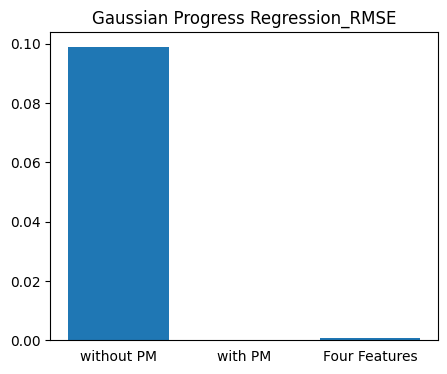

In [44]:
##세로 막대 그래프
plt.figure(figsize=(5,4))
models = ['without PM','with PM', 'Four Features']
values = [gpr_rmse,PM_gpr_rmse, F_gpr_rmse]
plt.bar(models, values)
plt.tick_params(axis='x', bottom=False)
#plt.ylim(0.0000, 1e-9)
plt.title('Gaussian Progress Regression_RMSE')
plt.show()

#  Ridge Regression

In [45]:
from sklearn import linear_model

ridge = linear_model.Ridge(alpha=0.1)
ridge.fit(X_train, y_train)

ridge_F = linear_model.Ridge(alpha=0.1)
ridge_F.fit(F_X_train, F_y_train)

ridge_PM = linear_model.Ridge(alpha=0.1)
ridge_PM.fit(PM_X_train, PM_y_train)

Ridge(alpha=0.1)

In [46]:
y_pred1 = ridge.predict(X_test)
F_y_pred1 = ridge_F.predict(F_X_test)
PM_y_pred1 = ridge_PM.predict(PM_X_test)

In [47]:
e2 = y_test.tolist()
e2.sort()
f2 = y_pred1.tolist()
f2.sort()

a2 = F_y_test.tolist()
a2.sort()
b2 = F_y_pred1.tolist()
b2.sort()

c2 = PM_y_test.tolist()
c2.sort()
d2 = PM_y_pred1.tolist()
d2.sort()

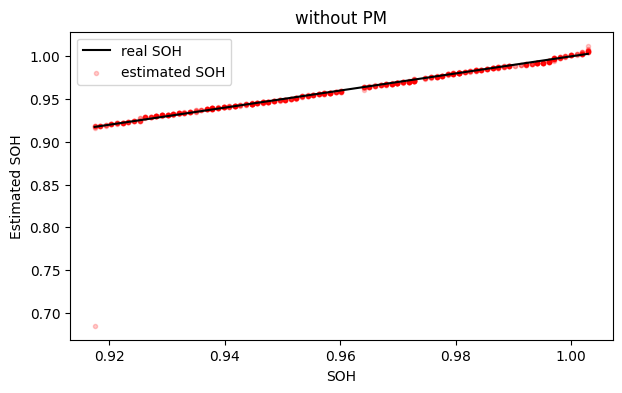

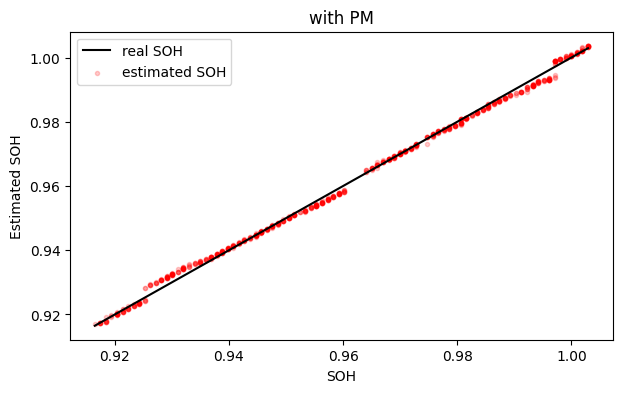

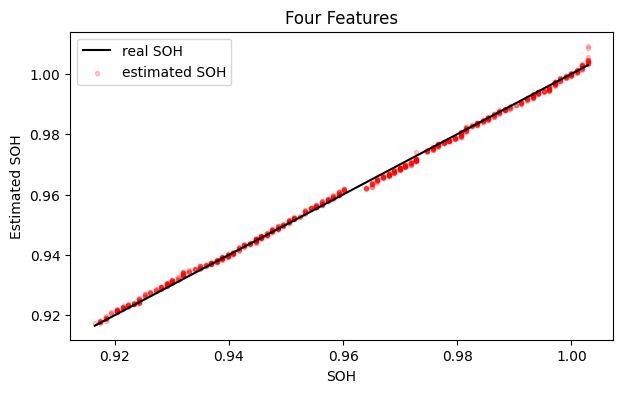

<Figure size 640x480 with 0 Axes>

In [49]:
##SOH##

titles = ['without PM', 'with PM', 'Four Features']

real = [e2, c2, a2]
est = [f2, d2, b2]

for i, (r, e, t) in enumerate(zip(real, est, titles)):
    plt.figure(figsize=(7,4))
    plt.plot(r, r, c='k', label='real SOH')
    plt.scatter(r, e, c='r', alpha=0.2, s=3**2, label='estimated SOH')
    plt.title(t)
    plt.xlabel('SOH')
    plt.ylabel('Estimated SOH')
    plt.legend()
    
plt.show()    
plt.savefig('Ridge_SOH_graph.png')

In [257]:
##without PM_RMSE##
s = []
n = len(y_test)
for r, e in zip(y_test.tolist(), y_pred1.tolist()):
    s.append((r-e)**2)
ridge_rmse = math.sqrt(sum(s)/n)
ridge_rmse

0.0014050912351366062

In [258]:
##with PM_RMSE##
s =[]
n = len(F_y_test)
for r, e in zip(F_y_test.tolist(), F_y_pred1.tolist()):
    s.append((r-e)**2)
F_ridge_rmse = math.sqrt(sum(s)/n)
F_ridge_rmse

0.0015912003521055492

In [259]:
##4 Features_RMSE##
s =[]
n = len(PM_y_test)
for r, e in zip(PM_y_test.tolist(), PM_y_pred1.tolist()):
    s.append((r-e)**2)
PM_ridge_rmse = math.sqrt(sum(s)/n)
PM_ridge_rmse

0.001260838775138395

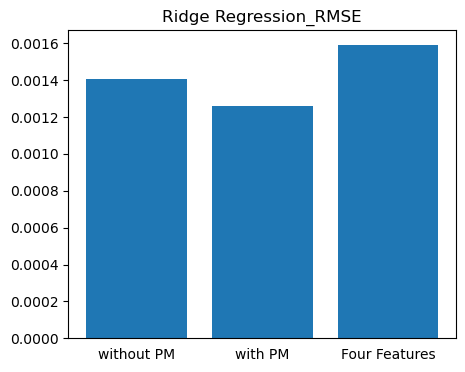

<Figure size 640x480 with 0 Axes>

In [577]:
##세로 막대 그래프
plt.figure(figsize=(5,4))
models = ['without PM', 'with PM', 'Four Features']
values = [ridge_rmse, PM_ridge_rmse, F_ridge_rmse]
plt.bar(models, values)
plt.tick_params(axis='x', bottom=False)
#plt.ylim(0.0000, 1e-9)
plt.title('Ridge Regression_RMSE')
plt.show()
plt.savefig('/media/sf_share/ridge_rmse.svg')

# SVR

In [77]:
y_train.values

array([0.96796117, 0.97281553, 0.98446602, ..., 0.95825243, 0.98058252,
       0.93883495])

In [78]:
y_st = y_train.values.reshape(len(y_train),1)
y_st = StandardScaler().fit_transform(y_st)
y_st = y_st.ravel()

svr = make_pipeline(StandardScaler(), SVR())
svr.fit(X_train, y_st)

y_pred_svr = svr.predict(X_test)

In [79]:
y_test_st = y_test.values.reshape(len(y_test),1)
y_test_st = StandardScaler().fit_transform(y_test_st)
y_test_st = y_test_st.ravel()

In [80]:
e3 = y_test_st.tolist()
e3.sort()
f3 = y_pred_svr.tolist()
f3.sort()

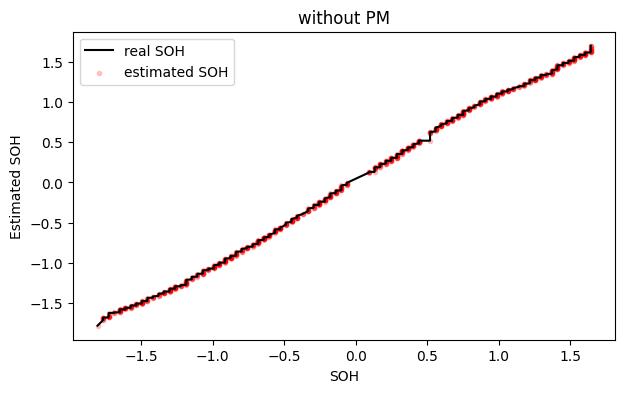

In [85]:
plt.figure(figsize=(7,4))

plt.plot(e3, f3, c='k', label='real SOH')
plt.scatter(e3, f3, c='r', alpha=0.2, s=3**2, label='estimated SOH')
plt.title('without PM')
plt.xlabel('SOH')
plt.ylabel('Estimated SOH')
plt.legend()

plt.show()

In [82]:
##without PM_RMSE##
s = []
n = len(y_test_st)
for r, e in zip(y_test_st.tolist(), y_pred_svr.tolist()):
    s.append((r-e)**2)
svr_rmse = math.sqrt(sum(s)/n)
svr_rmse

0.06293339819843496

In [83]:
PM_y_st = PM_y_train.values.reshape(len(PM_y_train),1)
PM_y_st = StandardScaler().fit_transform(PM_y_st)
PM_y_st = PM_y_st.ravel()

PM_svr = make_pipeline(StandardScaler(), SVR())
PM_svr.fit(PM_X_train, PM_y_st)

PM_y_pred_svr = PM_svr.predict(PM_X_test)


PM_y_test_st = PM_y_test.values.reshape(len(PM_y_test),1)
PM_y_test_st = StandardScaler().fit_transform(PM_y_test_st)
PM_y_test_st = PM_y_test_st.ravel()

e3 =PM_y_test_st.tolist()
e3.sort()
f3 = PM_y_pred_svr.tolist()
f3.sort()

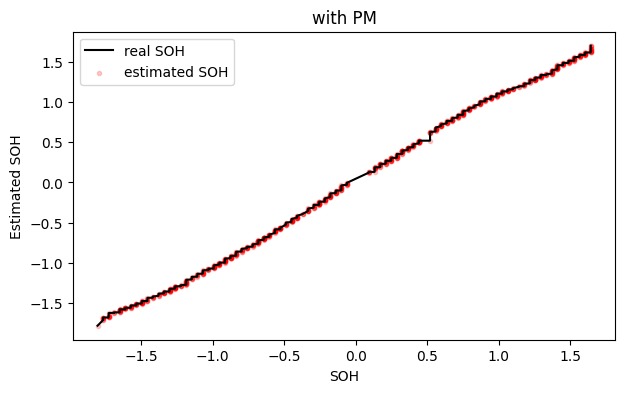

In [84]:
plt.figure(figsize=(7,4))

plt.plot(e3, f3, c='k', label='real SOH')
plt.scatter(e3, f3, c='r', alpha=0.2, s=3**2, label='estimated SOH')
plt.title('with PM')
plt.xlabel('SOH')
plt.ylabel('Estimated SOH')
plt.legend()

plt.show()

In [65]:
##with PM_RMSE##
s = []
n = len(PM_y_test_st)
for r, e in zip(PM_y_test_st.tolist(), PM_y_pred_svr.tolist()):
    s.append((r-e)**2)
PM_svr_rmse = math.sqrt(sum(s)/n)
PM_svr_rmse

0.06536680469469125

In [67]:
##RMSE##
s =[]
n = len(y_test)
for r, e in zip(y_test_.tolist(), y_pred_svr.tolist()):
    s.append((r-e)**2)
F_svr_rmse = math.sqrt(sum(s)/n)
F_svr_rmse

0.06293339819843496

In [72]:
e4 = y_test_st.tolist()
e4.sort()
f4 = y_pred_svr.tolist()
f4.sort()

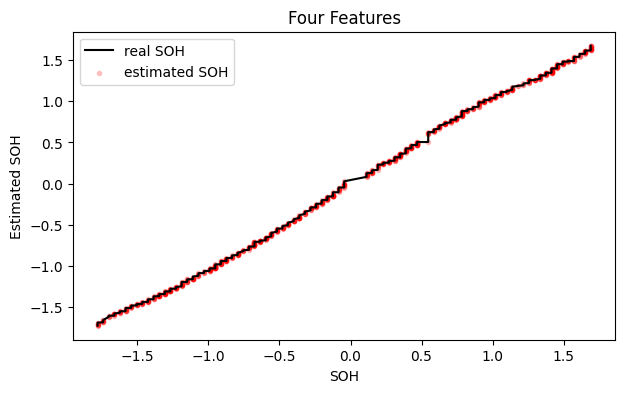

In [73]:
plt.figure(figsize=(7,4))

plt.plot(e4, f4, c='k', label='real SOH')
plt.scatter(e4, f4, c='r', alpha=0.2, s=3**2, label='estimated SOH')
plt.title('Four Features')
plt.xlabel('SOH')
plt.ylabel('Estimated SOH')
plt.legend()

plt.show()

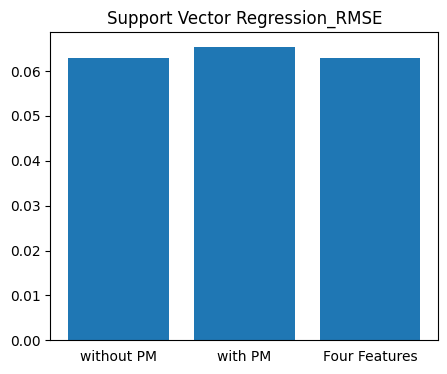

<Figure size 640x480 with 0 Axes>

In [68]:
##세로 막대 그래프
plt.figure(figsize=(5,4))
models = ['without PM', 'with PM', 'Four Features']
values = [svr_rmse, PM_svr_rmse, F_svr_rmse]
plt.bar(models, values)
plt.tick_params(axis='x', bottom=False)
#plt.ylim(0.0000, 1e-9)
plt.title('Support Vector Regression_RMSE')
plt.show()
plt.savefig('idge_rmse.svg')

In [574]:
F_y_st = F_y_train.values.reshape(len(F_y_train),1)
F_y_st = StandardScaler().fit_transform(F_y_st)
F_y_st = F_y_st.ravel()

F_svr = make_pipeline(StandardScaler(), SVR())
F_svr.fit(F_X_train, F_y_st)

F_y_pred_svr = F_svr.predict(F_X_test)


F_y_test_st = F_y_test.values.reshape(len(F_y_test),1)
F_y_test_st = StandardScaler().fit_transform(F_y_test_st)
F_y_test_st = F_y_test_st.ravel()

e3 =F_y_test_st.tolist()
e3.sort()
f3 = F_y_pred_svr.tolist()
f3.sort()

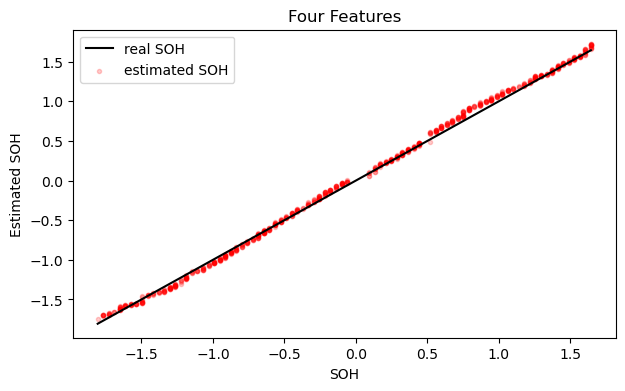

In [575]:
plt.figure(figsize=(7,4))

plt.plot(e3, e3, c='k', label='real SOH')
plt.scatter(e3, f3, c='r', alpha=0.2, s=3**2, label='estimated SOH')
plt.title('Four Features')
plt.xlabel('SOH')
plt.ylabel('Estimated SOH')
plt.legend()

plt.show()

In [576]:
#Four Features##
s = []
n = len(F_y_test_st)
for r, e in zip(F_y_test_st.tolist(), F_y_pred_svr.tolist()):
    s.append((r-e)**2)
F_svr_rmse = math.sqrt(sum(s)/n)
F_svr_rmse

0.05831377381045383

In [476]:
y_train.values

array([0.93786408, 0.96893204, 0.95631068, ..., 0.95242718, 0.99708738,
       0.92038835])

In [475]:
n_samples, n_features = 10, 5
rng = np.random.RandomState(0)
yy = rng.randn(n_samples)
xx = rng.randn(n_samples, n_features)
yy

array([ 1.76405235,  0.40015721,  0.97873798,  2.2408932 ,  1.86755799,
       -0.97727788,  0.95008842, -0.15135721, -0.10321885,  0.4105985 ])

결정계수 R : 0.40078242785737295


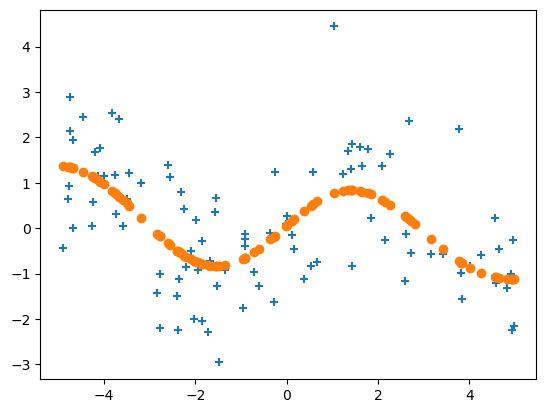

In [470]:
import matplotlib.pyplot as plot
import numpy as np
import math

x = np.random.rand(100,1)
x = x * 10-5

y = np.array([math.sin(i) for i in x])
#평균 0 표준편차 1인 가우시안 정규 분포 
y = y + np.random.randn(100)
#서포트 백터 머신 모듈 가져오기 
from sklearn.svm import SVR
model = SVR()
model.fit(x,y)
relation_square = model.score(x, y)
print('결정계수 R :', relation_square)
y_p = model.predict(x)

plot.scatter(x, y, marker = '+')
plot.scatter(x, y_p, marker = 'o')
plot.show()

# PCA

In [628]:
X = data.drop(['SOH', 'cycles', 'Qd_skew_dis', 'Qd_kurt_dis'], axis=1)
y = data[['SOH']]

In [629]:
X_T = X.T

In [630]:
y_T = y.T

In [634]:
st_X_T = StandardScaler().fit_transform(X_T.values)
features = [i for i in X_T.columns]
st_X_T = pd.DataFrame(st_X_T, columns=features).values

In [635]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
printcipalComponenets = pca.fit_transform(st_X_T)
principalDf = pd.DataFrame(data=printcipalComponenets, columns = ['X' ,'Y'])
principalDf.head()

,X,Y
0,-16.915968,-0.643459
1,-15.993020,-0.720751
2,-15.859018,-0.732615
3,290.345736,-5.351247
4,-22.010756,-0.168187


In [639]:
label=[]
for i in range(len(principalDf)):
    label.append(i+1)

features = pd.DataFrame(label, columns=['feautres'])

finalDf = pd.concat([principalDf, features], axis=1)

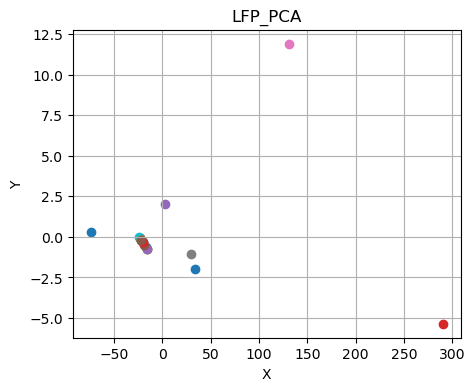

In [652]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,1, figsize=(5,4))

for i, row in finalDf.iterrows():
    feature = row['feautres']
    ax.scatter(row['X'], row['Y'], label = f'No.{feature}')

ax.set_xlabel('X', fontsize=10)
ax.set_ylabel('Y', fontsize=10)
ax.set_title('LFP_PCA', fontsize=12)
#ax.legend()
ax.grid()

In [602]:
##15 charging##
FinalDf = pd.concat([principalDf, y_T], axis=1)
FinalDf.head()

,X,Y,SOH
0,36.533215,-9.494655,1.000000
1,38.462329,-3.712096,1.001942
2,38.115339,-3.303283,1.002913
3,0.569780,-4.147608,NaN
4,0.411963,-4.153535,1.002913


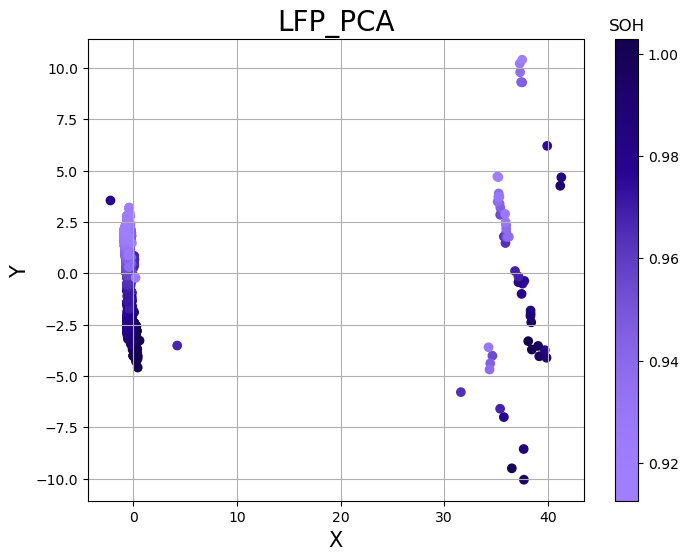

In [603]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.cm as cm

import matplotlib.colors as mcl

fig = plt.figure(figsize=(8,6))
h = 255
colors = [
    mcl.hsv_to_rgb((h/360,0.5,1)),
    mcl.hsv_to_rgb((h/360,0.97,0.57)),
    mcl.hsv_to_rgb((h/360,0.98,0.3))
]

cmap = mcl.LinearSegmentedColormap.from_list('my_cmap', colors, gamma=2)

vmax = max(FinalDf['SOH'].tolist())
vmin = min(FinalDf['SOH'].tolist())
norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
colormapping = cm.ScalarMappable(norm=norm, cmap=cmap)

fig.set_facecolor('white')
plt.scatter(FinalDf['X'], FinalDf['Y'], c=FinalDf['SOH'], cmap=cmap)

cbar = fig.colorbar(colormapping, ax = plt.gca())
cbar.ax.set_title('SOH')
plt.xlabel('X', fontsize=15)
plt.ylabel('Y', fontsize=15)
plt.title('LFP_PCA', fontsize=20)

plt.grid()
plt.show()